In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('02. Linear_bigmart_Train.csv')
test = pd.read_csv('02. Linear_bigmart_Test.csv')

train.shape
test.shape


(8523, 12)

(5681, 11)

In [3]:
# Checking the null values
train.isnull().any()
test.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [4]:
# Considering the mean values of Item Weight and Small value for Oytlize siez for filling the NAN Values 

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

train['Outlet_Size'].fillna('Small', inplace=True)
test['Outlet_Size'].fillna('Small', inplace=True)

In [5]:
train.select_dtypes(include=['object']).columns
train.select_dtypes(exclude=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train['Item_Visibility'].sort_values().head()

596     0.0
5881    0.0
3255    0.0
3257    0.0
3259    0.0
Name: Item_Visibility, dtype: float64

In [7]:
# since Item visibilty cannot be 0 hence we can fill 0 with np.mean
train['Item_Visibility'].replace(0, train['Item_Visibility'].mean(), inplace=True)
test['Item_Visibility'].replace(0, test['Item_Visibility'].mean(), inplace=True)


In [8]:
# for year we need to consider the recent age of the outler not the year 
train['Outlet_Establishment_Year']=2014-train['Outlet_Establishment_Year']
test['Outlet_Establishment_Year']=2014-test['Outlet_Establishment_Year']

In [9]:
# creation of dummy varibales for object type feilds
object_cols= train.select_dtypes(include=['object']).columns
object_cols = list(object_cols)
object_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
dummies = pd.get_dummies(train[object_cols], prefix=object_cols, drop_first=True)
dummies.head()

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [11]:
train.drop(object_cols, axis=1, inplace=True)
x = pd.concat([train, dummies], axis=1)

In [12]:
x.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1598)

In [80]:
train.Item_Fat_Content.replace('LF', 'Low Fat', inplace=True)
train.Item_Fat_Content.replace('low fat', 'Low Fat', inplace=True)
train.Item_Fat_Content.replace('reg', 'Regular', inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
y = x['Item_Outlet_Sales']
x =x.drop('Item_Outlet_Sales', 1)


In [14]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.3, random_state=0)
xtr.shape, xts.shape, ytr.shape, yts.shape

((5966, 1597), (2557, 1597), (5966,), (2557,))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr= LinearRegression()
lr.fit(xtr, ytr)
ypr = lr.predict(xts)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
ypr.shape

(2557,)

In [17]:
RMSE = np.sqrt(mean_squared_error(ypr, yts))
RMSE

9593768257.9955044

In [18]:
lr.score(x,y)
lr.score(xtr,ytr)
lr.score(xts,yts)

-9483207554366.6113

0.68015850036135173

-30225912359985.988

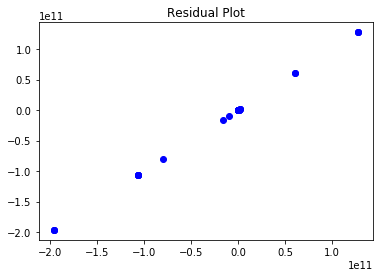

In [19]:
# Residual Plot 
x_plot= plt.scatter(ypr, (ypr-yts), c='b')
plt.hlines(y=0, xmin=-1000, xmax=5000)
plt.title('Residual Plot')
plt.show()


In [21]:
coff = pd.DataFrame(xtr.columns)
coff['Coefficients']= pd.Series(lr.coef_)
coff

,0,Coefficients
0,Item_Weight,8.038764e-01
1,Item_Visibility,-7.455533e+02
2,Item_MRP,-1.837466e+01
3,Outlet_Establishment_Year,-1.876121e+09
4,Item_Identifier_DRA24,3.185118e+10
5,Item_Identifier_DRA59,3.185118e+10
6,Item_Identifier_DRB01,9.448950e+02
7,Item_Identifier_DRB13,3.185118e+10
8,Item_Identifier_DRB24,-3.432672e+02
9,Item_Identifier_DRB25,-1.149414e+03


In [66]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
train = train.iloc[: , 1:]
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
test = test.iloc[:, 1:]
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [69]:
obj_cols = train.select_dtypes(include=['object']).columns
obj_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [70]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [71]:
train.isnull().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [72]:
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)
train.Outlet_Size.fillna('Small', inplace=True)

In [73]:
test.isnull().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [74]:
test.Item_Weight.fillna(test.Item_Weight.mean(), inplace=True)
test.Outlet_Size.fillna('Small', inplace=True)

In [75]:
train.Item_Visibility.replace(0, train.Item_Visibility.mean(), inplace=True)
test.Item_Visibility.replace(0, test.Item_Visibility.mean(), inplace=True)

In [81]:
dummies = pd.get_dummies(train[obj_cols], drop_first=True, prefix=obj_cols)
dummies.columns   

Index(['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [78]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [85]:
train_int_cols = train.drop(obj_cols, axis=1)
df = pd.concat([train_int_cols, dummies], axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.066132,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [86]:
y = df['Item_Outlet_Sales']
x = df.drop('Item_Outlet_Sales',axis=1)
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,1998,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.066132,53.8614,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [87]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x,y, test_size=0.3, random_state=0)

xtr.shape, xts.shape, ytr.shape, yts.shape

((5966, 36), (2557, 36), (5966,), (2557,))

In [89]:
lr = LinearRegression()
lr.fit(xtr, ytr)

ypr=lr.predict(xts)
lr.score(x,y)
lr.score(xtr, ytr)
lr.score(xts, yts)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.56320980660892239

0.56333125554983199

0.56273143756213018

In [99]:
MSE = mean_squared_error(yts, ypr)
RMSE = np.sqrt(mean_squared_error(yts, ypr))
MAE = mean_absolute_error(yts, ypr)

In [114]:
print(RMSE)

1153.91452908


In [123]:
coffs = pd.Series(lr.coef_, xtr.columns).sort_values()
coffs.plot(kind='bar')

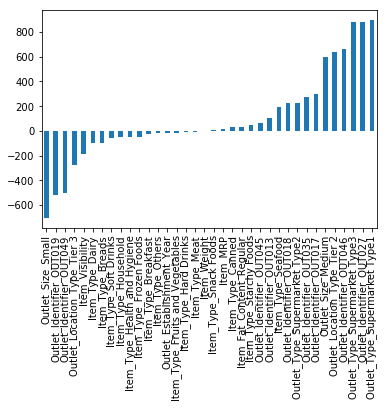

In [124]:
coffs.plot(kind='bar')

In [125]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

0.56062944769411094

0.56162874164910237

0.55823013100918739

1159.8386047822321

865.38491950582238

1345225.5891431947

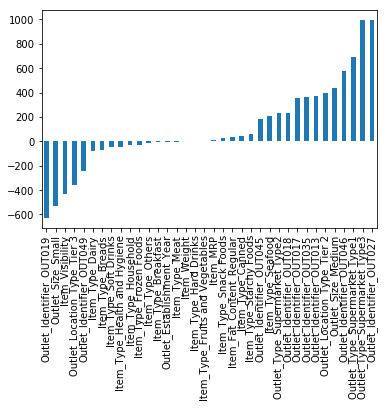

In [128]:
# Ridge 
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(xtr, ytr)
rdge_pyr = ridge.predict(xts)

ridge.score(x,y)
ridge.score(xtr, ytr)
ridge.score(xts, yts)


MSE = mean_squared_error(yts, rdge_pyr)
RMSE = np.sqrt(mean_squared_error(yts, rdge_pyr))
MAE = mean_absolute_error(yts, rdge_pyr)

RMSE
MAE
MSE

coffs = pd.Series(ridge.coef_, xtr.columns).sort_values()
coffs.plot(kind='bar')

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

0.19425588808055516

0.19645486569392501

0.18905459854102102

1571.4310205290117

1235.937484628688

2469395.4522808511

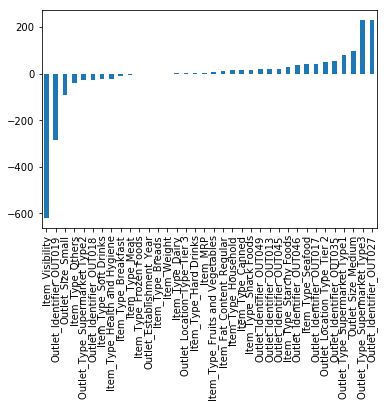

In [129]:
ridge = Ridge(alpha=5, normalize=True)
ridge.fit(xtr, ytr)
rdge_pyr = ridge.predict(xts)

ridge.score(x,y)
ridge.score(xtr, ytr)
ridge.score(xts, yts)


MSE = mean_squared_error(yts, rdge_pyr)
RMSE = np.sqrt(mean_squared_error(yts, rdge_pyr))
MAE = mean_absolute_error(yts, rdge_pyr)

RMSE
MAE
MSE

coffs = pd.Series(ridge.coef_, xtr.columns).sort_values()
coffs.plot(kind='bar')

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

0.11556296649265574

0.11690090361574124

0.112206283904418

1644.2034215866079

1296.2186016443086

2703404.8915571086

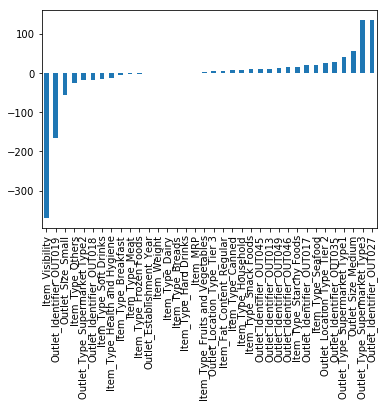

In [130]:
ridge = Ridge(alpha=10, normalize=True)
ridge.fit(xtr, ytr)
rdge_pyr = ridge.predict(xts)

ridge.score(x,y)
ridge.score(xtr, ytr)
ridge.score(xts, yts)


MSE = mean_squared_error(yts, rdge_pyr)
RMSE = np.sqrt(mean_squared_error(yts, rdge_pyr))
MAE = mean_absolute_error(yts, rdge_pyr)

RMSE
MAE
MSE

coffs = pd.Series(ridge.coef_, xtr.columns).sort_values()
coffs.plot(kind='bar')